In [40]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


__1. Завантаження датасетів та обчислення помилок для ліктьового методу__

In [62]:
datasets = ['data\data_2d.csv', 'data\mnist.csv']

distortion_list = {}

data_list = []

for dataset in datasets:

    df = pd.read_csv(dataset)

    data = df.drop(df.columns[[0]], axis=1)

    data_list.append(data)

    distortion = []

    dataset = dataset.split('\\')

    name = dataset[1].split('.')

    for k in range(1, 30):
        km = KMeans(n_clusters=k, n_init='auto').fit(data)
        distortion.append(
            np.sum(np.min(cdist(data, km.cluster_centers_, 'euclidean'), axis=1)) / len(data))
    
    distortion_list.update({name[0]: distortion})
    

__2. Вивід графіків для аналізу ліктьового методу__

<function matplotlib.pyplot.show(close=None, block=None)>

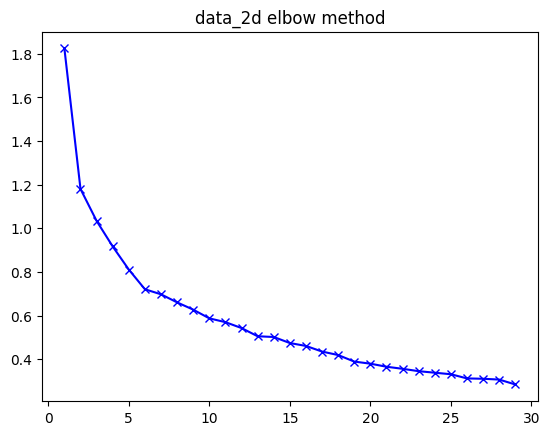

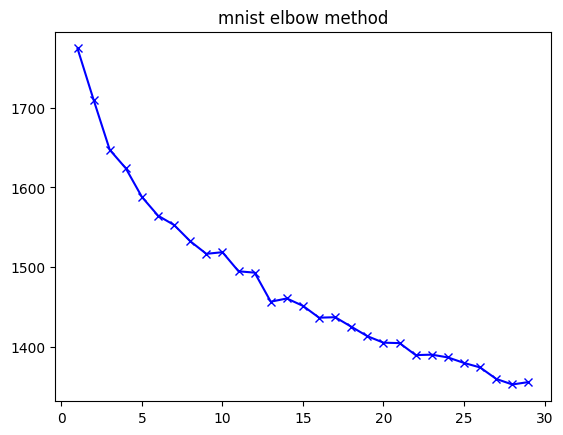

In [63]:
for k, v in distortion_list.items():
    plt.figure()
    plt.plot(range(1, 30), v, 'bx-')
    plt.title(k + ' elbow method')
plt.show

З графіків видно, що кількість кластерів для першого датасету - 6б для другого - 8

__3. Застосування алгоритму kmeans для першого датасету__

In [59]:
data_2d = np.array(data_list[0])

kmeans_2d = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans_2d.fit(data_2d)

cluster_centers_2d = kmeans_2d.cluster_centers_


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


__4. Зменшення розмірності другого датасетру до 2 та застосування алгоритму kmeans для нього__

In [55]:
data_mnist = np.array(data_list[1])

pca = PCA(n_components=2)
data_mnist_2d = pca.fit_transform(data_mnist)

kmeans_mnist = KMeans(n_clusters=8, init='k-means++', random_state=42)
kmeans_mnist.fit(data_mnist_2d)

cluster_centers_mnist = kmeans_mnist.cluster_centers_

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


__5. Візуалізація розподілу для першого датасету(центри кластерів позначено +)__

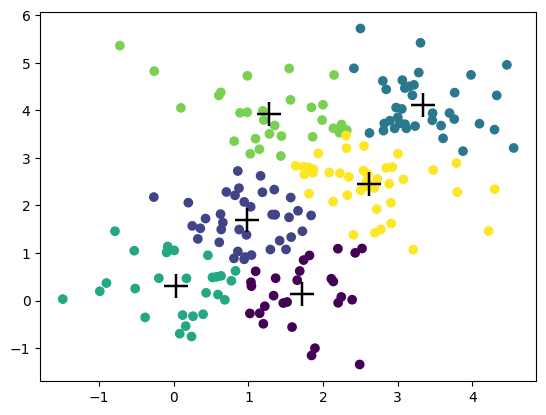

In [64]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_2d.labels_)

for i in cluster_centers_2d:
    plt.scatter(
        cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], marker='+', c='k', s=300)


__6. Візуалізація розподілу для другого датасету(центри кластерів позначено +)__

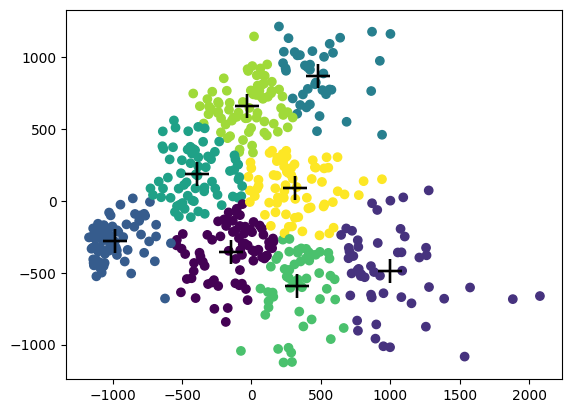

In [56]:
plt.scatter(data_mnist_2d[:, 0], data_mnist_2d[:, 1],
            c=kmeans_mnist.labels_)

for i in cluster_centers_mnist:
    plt.scatter(
        cluster_centers_mnist[:, 0], cluster_centers_mnist[:, 1], marker='+', c='k', s=300)
